In [157]:
import numpy as np
import  pandas as pd


In [158]:
df_data = pd.read_csv('kidney_disease.csv')

In [159]:
print(df_data)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [160]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [161]:
df_data.shape

(400, 26)

In [162]:
df_data.describe()
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [163]:
text_columns=["pcv","wc","rc" ]
for i in text_columns:
    print(f"{i}:{df_data[i].dtype}")

pcv:object
wc:object
rc:object


In [164]:
def convert_text_to_numeric(df_data,column):
    df_data[column] = pd.to_numeric(df_data[column],errors='coerce')
for column in text_columns:
    convert_text_to_numeric(df_data,column)
    print(f"{column}:{df_data[column].dtype}")

pcv:float64
wc:float64
rc:float64


In [165]:
missing = df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False)

rbc      152
rc       131
wc       106
pot       88
sod       87
pcv       71
pc        65
hemo      52
su        49
sg        47
al        46
bgr       44
bu        19
sc        17
bp        12
age        9
ba         4
pcc        4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [166]:
def mean_value_imputation(df_data,column):
    mean_value = df_data[column].mean()
    df_data[column]=df_data[column].fillna(mean_value)
def mode_value_imputation(df_data,column):
    mode_value = df_data[column].mode()[0]
    df_data[column]=df_data[column].fillna(mode_value)

In [167]:
num_columns=[col for col in df_data.columns if df_data[col].dtype!=object]
for col_names in num_columns:
    mean_value_imputation(df_data,col_names)

In [168]:
missing = df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False)

rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [169]:
cat_columns=[col for col in df_data.columns if df_data[col].dtype==object]
for col_names in cat_columns:
    mode_value_imputation(df_data,col_names)

In [170]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [171]:
print(f"dm: {(df_data['dm'].unique())}")
print(f"cad: {(df_data['cad'].unique())}")
print(f"classification: {(df_data['classification'].unique())}")

dm: ['yes' 'no' ' yes' '\tno' '\tyes']
cad: ['no' 'yes' '\tno']
classification: ['ckd' 'ckd\t' 'notckd']


In [172]:
df_data['dm'] = df_data['dm'].replace(to_replace={" yes":"yes","\tno":"no","\tyes":"yes"})
df_data['cad'] = df_data['cad'].replace(to_replace={"\tno":"no"})
df_data['classification'] = df_data['classification'].replace(to_replace={"ckd\t":"ckd"})

In [173]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [174]:
print(f"dm: {(df_data['dm'].unique())}")
print(f"cad: {(df_data['cad'].unique())}")
print(f"classification: {(df_data['classification'].unique())}")
print(f"cad: {(df_data['cad'].unique())}")


dm: ['yes' 'no']
cad: ['no' 'yes']
classification: ['ckd' 'notckd']
cad: ['no' 'yes']


In [175]:
df_data['classification'] = df_data['classification'].map({'ckd':1,'notckd':0})
df_data['cad'] = df_data['cad'].map({'yes':1,'no':0})
df_data['rbc'] = df_data['rbc'].map({'normal':1,'abnormal':0})
df_data['pc'] = df_data['pc'].map({"normal":1,"abnormal":0})
df_data['pcc'] = df_data['pcc'].map({"present":1,"notpresent":0})
df_data['ba'] = df_data['ba'].map({"present":1,"notpresent":0})
df_data['htn'] = df_data['htn'].map({"yes":1,"no":0})
df_data['dm'] = df_data['dm'].map({"yes":1,"no":0})
df_data['pe'] = df_data['pe'].map({"yes":1,"no":0})
df_data['ane'] = df_data['ane'].map({"yes":1,"no":0})
df_data['appet'] = df_data['appet'].map({'good':1,'poor':0})


In [176]:
df_data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [177]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

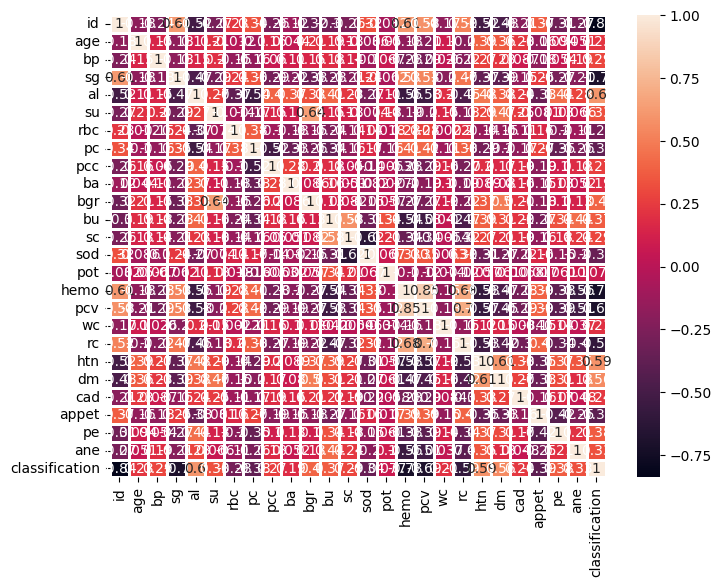

In [183]:
plt.figure(figsize=(8,6))
sns.heatmap(df_data.corr(),annot=True,linewidths=5)
plt.show()